In [5]:

import h5py
#data file type h5py
import time
import copy
from random import randint
# be name khoda
import numpy as np
#import tensorflow as tf
#import mnist_reader
from mnist import MNIST
from keras.datasets import mnist
import keras
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


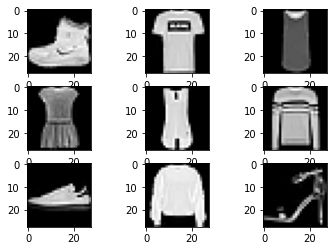

In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

C:\Users\FATEMEH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


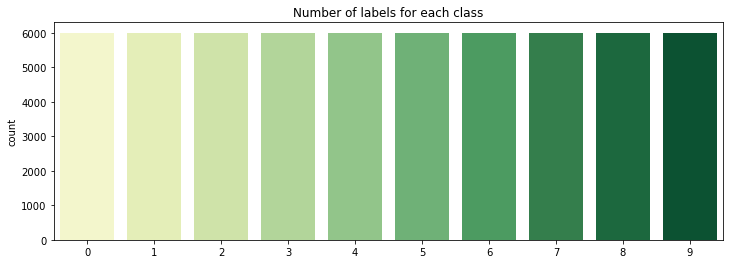

In [31]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data, order =labels , palette='YlGn')
    g.set_title("Number of labels for each class")

    plt.show()  
    
plot_label_per_class(trainy)

# MLP with NO Hidden layers (with 20000 iterations,50000 iterations and 100000 iterations)

C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\3346620018.py:69: RuntimeWarning: overflow encountered in exp
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\3346620018.py:69: RuntimeWarning: invalid value encountered in multiply
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\3346620018.py:72: RuntimeWarning: divide by zero encountered in log
  return -np.log(v[y])


Accuarcy:  0.5982
Accuarcy:  0.6794833333333333
iteration 5000, loss = 60003.26845498281, test = 0.5982,train=0.6794833333333333
Accuarcy:  0.5264
Accuarcy:  0.7245
iteration 10000, loss = 49522.128674481886, test = 0.5264,train=0.7245
Accuarcy:  0.5101
Accuarcy:  0.7327166666666667
iteration 15000, loss = 47077.67632988086, test = 0.5101,train=0.7327166666666667
Accuarcy:  0.5067
Accuarcy:  0.7378166666666667
iteration 20000, loss = 47196.78722311793, test = 0.5067,train=0.7378166666666667
Accuarcy:  0.7281
Accuarcy:  0.7378166666666667


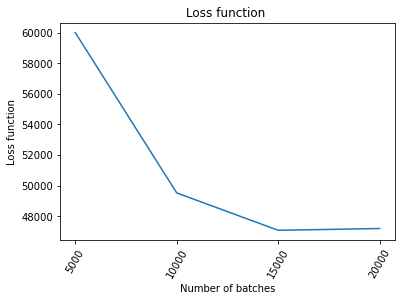

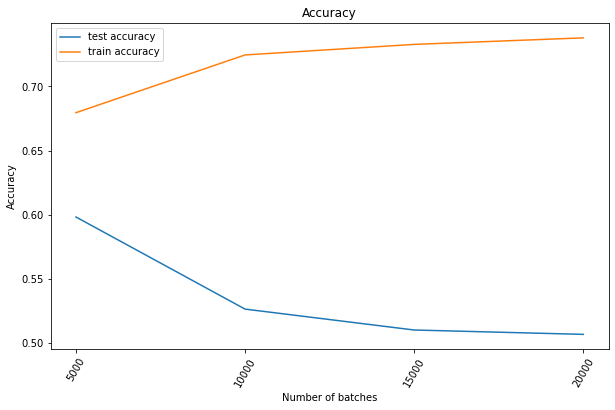

In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255

x_ttest = x_test / 255




class mlp:
    output_layer = {}
    

    def __init__(self, x, layer, y):
        
        self.output_layer['parameter'] = np.random.randn(y,x) / np.sqrt(num_x)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(num_x)

        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        # Leaky Rectified Linear Unit (leaky ReLU) Activation Function
        return r
    
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)
            

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    


    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        out_lay = np.matmul(self.output_layer['parameter'],x).reshape((self.output_size,1)) + self.output_layer['bias']
        out_l = np.array(self.ReLU(out_lay)).reshape((self.output_size,1))
        predict_r = np.squeeze(self.Softmax(out_l))
        error = self.cross_entropy(predict_r,y)
        values=[out_lay,out_l,predict_r,error]
        keys= ['out_lay','out_l','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       
        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['out_lay'].T)
        dW = np.matmul(dU.reshape((self.output_size,1)),x.reshape((1,784)))
        values = [dC,dU,dW]
        keys = ['dC','dU','dW']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):

        self.output_layer['bias'] -= learning_rate*b_result['dU']
        self.output_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
  
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_batches = 1000, learning_rate = 0.5):

        rand_indices = np.random.choice(len(X_train), num_batches, replace=True)
        
        def l_rate(base_rate, ite, num_batches, schedule = False):

            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_batches*5))
            else:
                return base_rate
        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X, Y):

        total_correct = 0
        for n in range(len(X)):
            y = Y[n]
            x = X[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy: ',total_correct/len(X))
        return total_correct/np.float(len(X))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 20000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_batches=num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test)
accu_test = model.predict(x_ttrain,y_train)

plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()

C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\300905100.py:68: RuntimeWarning: overflow encountered in exp
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\300905100.py:68: RuntimeWarning: invalid value encountered in multiply
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\300905100.py:71: RuntimeWarning: divide by zero encountered in log
  return -np.log(v[y])


Accuarcy:  0.5234
Accuarcy:  0.73895
iteration 5000, loss = 47547.43452587837, test = 0.5234,train=0.73895


C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\300905100.py:68: RuntimeWarning: overflow encountered in add
  return 1/sum(np.exp(z)) * np.exp(z)


Accuarcy:  0.4579
Accuarcy:  0.7351166666666666
iteration 10000, loss = 47886.8419293737, test = 0.4579,train=0.7351166666666666
Accuarcy:  0.4228
Accuarcy:  0.7619333333333334
iteration 15000, loss = 43752.072251775935, test = 0.4228,train=0.7619333333333334
Accuarcy:  0.4197
Accuarcy:  0.7908166666666666
iteration 20000, loss = 36707.92461426556, test = 0.4197,train=0.7908166666666666
Accuarcy:  0.3421
Accuarcy:  0.7951333333333334
iteration 25000, loss = 37478.646880848755, test = 0.3421,train=0.7951333333333334
Accuarcy:  0.3906
Accuarcy:  0.7844333333333333
iteration 30000, loss = 38078.33187768768, test = 0.3906,train=0.7844333333333333
Accuarcy:  0.3718
Accuarcy:  0.7884833333333333
iteration 35000, loss = 39130.89765485212, test = 0.3718,train=0.7884833333333333
Accuarcy:  0.3476
Accuarcy:  0.7966333333333333
iteration 40000, loss = 37158.33513602905, test = 0.3476,train=0.7966333333333333
Accuarcy:  0.3295
Accuarcy:  0.7889
iteration 45000, loss = 37924.90647409109, test = 0.3

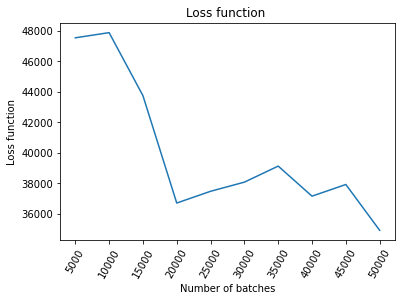

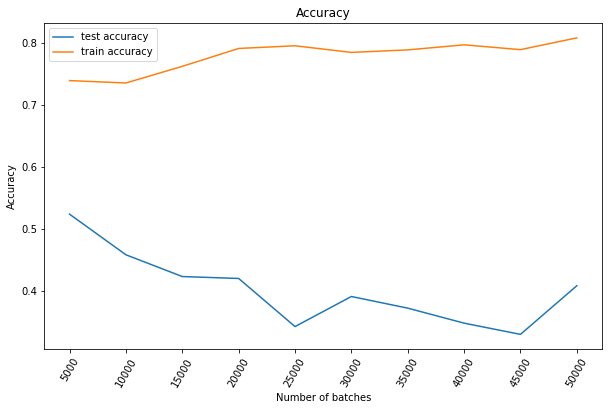

In [15]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255

x_ttest = x_test / 255



class mlp:
    output_layer = {}
    

    def __init__(self, x, layer, y):
        
        self.output_layer['parameter'] = np.random.randn(y,x) / np.sqrt(num_x)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(num_x)

        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        # Leaky Rectified Linear Unit (leaky ReLU) Activation Function
        return r
    
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)
            

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    


    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        out_lay = np.matmul(self.output_layer['parameter'],x).reshape((self.output_size,1)) + self.output_layer['bias']
        out_l = np.array(self.ReLU(out_lay)).reshape((self.output_size,1))
        predict_r = np.squeeze(self.Softmax(out_l))
        error = self.cross_entropy(predict_r,y)
        values=[out_lay,out_l,predict_r,error]
        keys= ['out_lay','out_l','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       
        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['out_lay'].T)
        dW = np.matmul(dU.reshape((self.output_size,1)),x.reshape((1,784)))
        values = [dC,dU,dW]
        keys = ['dC','dU','dW']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):

        self.output_layer['bias'] -= learning_rate*b_result['dU']
        self.output_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
  
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_batches = 1000, learning_rate = 0.5):

        rand_indices = np.random.choice(len(X_train), num_batches, replace=True)
        
        def l_rate(base_rate, ite, num_batches, schedule = False):

            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_batches*5))
            else:
                return base_rate
        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X, Y):

        total_correct = 0
        for n in range(len(X)):
            y = Y[n]
            x = X[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy: ',total_correct/len(X))
        return total_correct/np.float(len(X))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 50000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_batches=num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test)
accu_test = model.predict(x_ttrain,y_train)

plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()

In [52]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255

x_ttest = x_test / 255




class mlp:
    output_layer = {}
    

    def __init__(self, x, layer, y):
        
        self.output_layer['parameter'] = np.random.randn(y,x) / np.sqrt(num_x)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(num_x)

        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        # Leaky Rectified Linear Unit (leaky ReLU) Activation Function
        return r
    
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)
            

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    


    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        out_lay = np.matmul(self.output_layer['parameter'],x).reshape((self.output_size,1)) + self.output_layer['bias']
        out_l = np.array(self.ReLU(out_lay)).reshape((self.output_size,1))
        predict_r = np.squeeze(self.Softmax(out_l))
        error = self.cross_entropy(predict_r,y)
        values=[out_lay,out_l,predict_r,error]
        keys= ['out_lay','out_l','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       
        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['out_lay'].T)
        dW = np.matmul(dU.reshape((self.output_size,1)),x.reshape((1,784)))
        values = [dC,dU,dW]
        keys = ['dC','dU','dW']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):

        self.output_layer['bias'] -= learning_rate*b_result['dU']
        self.output_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
  
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_batches = 1000, learning_rate = 0.5):

        rand_indices = np.random.choice(len(X_train), num_batches, replace=True)
        
        def l_rate(base_rate, ite, num_batches, schedule = False):

            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_batches*5))
            else:
                return base_rate
        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X, Y):

        total_correct = 0
        for n in range(len(X)):
            y = Y[n]
            x = X[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy: ',total_correct/len(X))
        return total_correct/np.float(len(X))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 100000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_batches=num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test)
accu_test = model.predict(x_ttrain,y_train)



C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25388\2957724374.py:69: RuntimeWarning: overflow encountered in exp
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25388\2957724374.py:69: RuntimeWarning: invalid value encountered in multiply
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25388\2957724374.py:72: RuntimeWarning: divide by zero encountered in log
  return -np.log(v[y])


Accuarcy:  0.4524
Accuarcy:  0.7697333333333334
iteration 5000, loss = 42080.40040427087, test = 0.4524,train=0.7697333333333334
Accuarcy:  0.4191
Accuarcy:  0.7629333333333334
iteration 10000, loss = 42384.710819643304, test = 0.4191,train=0.7629333333333334
Accuarcy:  0.3917
Accuarcy:  0.7905166666666666
iteration 15000, loss = 37614.791861162, test = 0.3917,train=0.7905166666666666
Accuarcy:  0.4009
Accuarcy:  0.7622833333333333
iteration 20000, loss = 41719.30121916843, test = 0.4009,train=0.7622833333333333
Accuarcy:  0.3669
Accuarcy:  0.8168
iteration 25000, loss = 33597.082412698845, test = 0.3669,train=0.8168
Accuarcy:  0.3739
Accuarcy:  0.8108333333333333
iteration 30000, loss = 33193.117512265075, test = 0.3739,train=0.8108333333333333
Accuarcy:  0.3368
Accuarcy:  0.8205
iteration 35000, loss = 32549.138903579114, test = 0.3368,train=0.8205
Accuarcy:  0.4027
Accuarcy:  0.8282666666666667
iteration 40000, loss = 30194.44315966071, test = 0.4027,train=0.8282666666666667
Accuarc

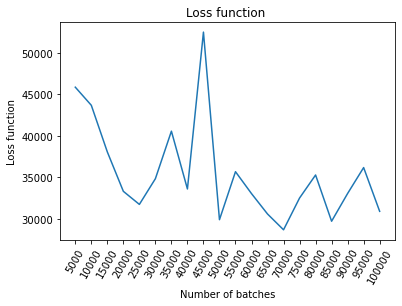

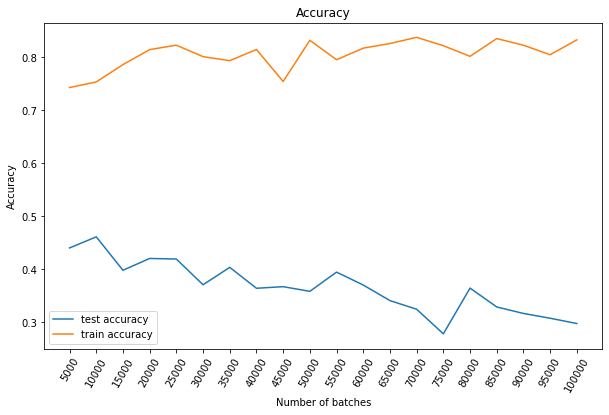

In [40]:
# plotting the loss function and test accuracy corresponding to the number of batches
import matplotlib.pyplot as plt
plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()


# MLP with 1 Hidden layers( with 20000 iterations,50000 iterations and 100000 iterations)

C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\1189410426.py:70: RuntimeWarning: overflow encountered in exp
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\1189410426.py:70: RuntimeWarning: invalid value encountered in multiply
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\1189410426.py:73: RuntimeWarning: divide by zero encountered in log
  return -np.log(v[y])


Accuarcy:  0.5748
Accuarcy:  0.6087166666666667
iteration 5000, loss = 68298.12255025274, test = 0.5748,train=0.6087166666666667
Accuarcy:  0.6109
Accuarcy:  0.637
iteration 10000, loss = 52768.48587962477, test = 0.6109,train=0.637
Accuarcy:  0.6446
Accuarcy:  0.68285
iteration 15000, loss = 48918.11620929507, test = 0.6446,train=0.68285
Accuarcy:  0.5338
Accuarcy:  0.6647333333333333
iteration 20000, loss = 53858.249359848465, test = 0.5338,train=0.6647333333333333
Accuarcy:  0.6573
Accuarcy:  0.6647333333333333


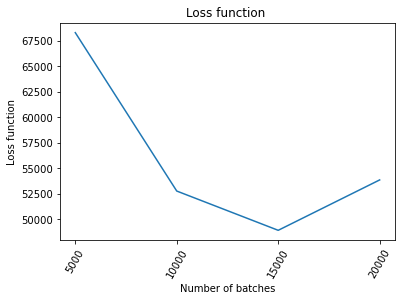

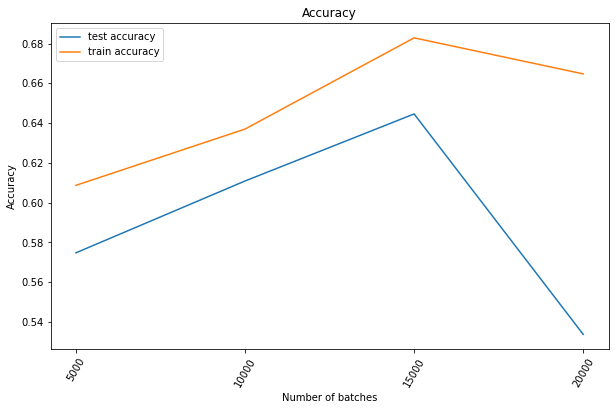

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255

x_ttest = x_test / 255




class mlp:
    hidden_layer = {}
    output_layer = {}

    def __init__(self, x, layer, y):
        
        self.hidden_layer['parameter'] = np.random.randn(layer,x) / np.sqrt(num_x)
        self.hidden_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        self.output_layer['parameter'] = np.random.randn(y,layer) / np.sqrt(layer)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(layer)
        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        # Leaky Rectified Linear Unit (leaky ReLU) Activation Function
        return r
    
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)
            

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    


    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        Hidden_lay = np.matmul(self.hidden_layer['parameter'],x).reshape((self.hid_size,1)) + self.hidden_layer['bias']
        Hidden_l = np.array(self.ReLU(Hidden_lay)).reshape((self.hid_size,1))
        out_lay = np.matmul(self.output_layer['parameter'],Hidden_l).reshape((self.output_size,1)) + self.output_layer['bias']
        predict_r = np.squeeze(self.Softmax(out_lay))
        error = self.cross_entropy(predict_r,y)
        values=[Hidden_lay,Hidden_l,out_lay,predict_r,error]
        keys= ['Hidden_lay','Hidden_l','out_lay','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       
        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['Hidden_l'].T)
        delta = np.matmul(self.output_layer['parameter'].T,dU)
        db_1 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay']).reshape(self.hid_size,1)
        dW = np.matmul(db_1.reshape((self.hid_size,1)),x.reshape((1,784)))
        values = [dC,dU,db_1,dW]
        keys = ['dC','dU','db_1','dW']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):
        # update the hyperparameters
        self.output_layer['parameter'] -= learning_rate*b_result['dC']
        self.output_layer['bias'] -= learning_rate*b_result['dU']
        self.hidden_layer['bias'] -= learning_rate*b_result['db_1']
        self.hidden_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_batches = 1000, learning_rate = 0.5):
        # generate a random list of indices for the training set
        rand_indices = np.random.choice(len(X_train), num_batches, replace=True)
        
        def l_rate(base_rate, ite, num_batches, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_batches*5))
            else:
                return base_rate

        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X,Y):

        total_correct = 0
        for n in range(len(X)):
            y = Y[n]
            x = X[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy: ',total_correct/len(X))
        return total_correct/np.float(len(X))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 20000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_batches=num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test)
accu_train = model.predict(x_ttrain,y_train)

plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()


C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\215938139.py:70: RuntimeWarning: overflow encountered in exp
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\215938139.py:70: RuntimeWarning: invalid value encountered in multiply
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\215938139.py:73: RuntimeWarning: divide by zero encountered in log
  return -np.log(v[y])


Accuarcy:  0.5073
Accuarcy:  0.6630833333333334
iteration 5000, loss = 52322.02693261434, test = 0.5073,train=0.6630833333333334
Accuarcy:  0.526
Accuarcy:  0.70315
iteration 10000, loss = 46652.2861342063, test = 0.526,train=0.70315
Accuarcy:  0.5688
Accuarcy:  0.77615
iteration 15000, loss = 37960.433438996435, test = 0.5688,train=0.77615
Accuarcy:  0.5669
Accuarcy:  0.7408333333333333
iteration 20000, loss = 40732.15759406146, test = 0.5669,train=0.7408333333333333
Accuarcy:  0.5792
Accuarcy:  0.7893
iteration 25000, loss = 37810.97674356176, test = 0.5792,train=0.7893
Accuarcy:  0.5864
Accuarcy:  0.7592666666666666
iteration 30000, loss = 38354.33726380647, test = 0.5864,train=0.7592666666666666
Accuarcy:  0.6227
Accuarcy:  0.7731666666666667
iteration 35000, loss = 34591.81915958552, test = 0.6227,train=0.7731666666666667
Accuarcy:  0.5619
Accuarcy:  0.7878166666666667
iteration 40000, loss = 34845.27401716888, test = 0.5619,train=0.7878166666666667
Accuarcy:  0.6031
Accuarcy:  0.

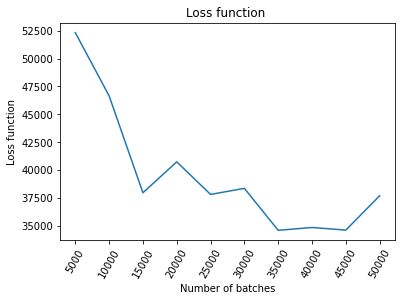

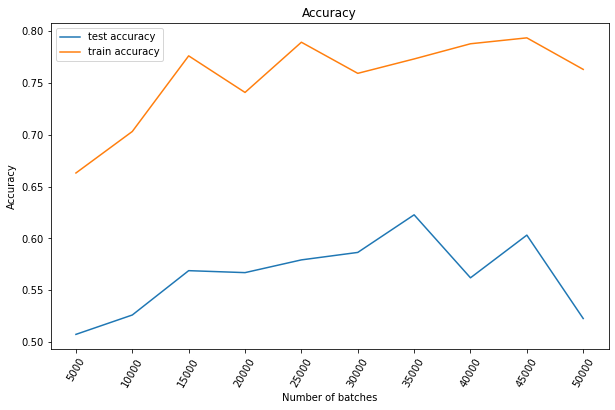

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255

x_ttest = x_test / 255




class mlp:
    hidden_layer = {}
    output_layer = {}

    def __init__(self, x, layer, y):
        
        self.hidden_layer['parameter'] = np.random.randn(layer,x) / np.sqrt(num_x)
        self.hidden_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        self.output_layer['parameter'] = np.random.randn(y,layer) / np.sqrt(layer)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(layer)
        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        # Leaky Rectified Linear Unit (leaky ReLU) Activation Function
        return r
    
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)
            

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    


    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        Hidden_lay = np.matmul(self.hidden_layer['parameter'],x).reshape((self.hid_size,1)) + self.hidden_layer['bias']
        Hidden_l = np.array(self.ReLU(Hidden_lay)).reshape((self.hid_size,1))
        out_lay = np.matmul(self.output_layer['parameter'],Hidden_l).reshape((self.output_size,1)) + self.output_layer['bias']
        predict_r = np.squeeze(self.Softmax(out_lay))
        error = self.cross_entropy(predict_r,y)
        values=[Hidden_lay,Hidden_l,out_lay,predict_r,error]
        keys= ['Hidden_lay','Hidden_l','out_lay','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       
        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['Hidden_l'].T)
        delta = np.matmul(self.output_layer['parameter'].T,dU)
        db_1 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay']).reshape(self.hid_size,1)
        dW = np.matmul(db_1.reshape((self.hid_size,1)),x.reshape((1,784)))
        values = [dC,dU,db_1,dW]
        keys = ['dC','dU','db_1','dW']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):
        # update the hyperparameters
        self.output_layer['parameter'] -= learning_rate*b_result['dC']
        self.output_layer['bias'] -= learning_rate*b_result['dU']
        self.hidden_layer['bias'] -= learning_rate*b_result['db_1']
        self.hidden_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_batches = 1000, learning_rate = 0.5):
        # generate a random list of indices for the training set
        rand_indices = np.random.choice(len(X_train), num_batches, replace=True)
        
        def l_rate(base_rate, ite, num_batches, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_batches*5))
            else:
                return base_rate

        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X, Y):

        total_correct = 0
        for n in range(len(X)):
            y = Y[n]
            x = X[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy: ',total_correct/len(X))
        return total_correct/np.float(len(X))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 50000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_batches=num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test)
accu_train = model.predict(x_ttrain,y_train)

plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()


In [53]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255

x_ttest = x_test / 255




class mlp:
    hidden_layer = {}
    output_layer = {}

    def __init__(self, x, layer, y):
        
        self.hidden_layer['parameter'] = np.random.randn(layer,x) / np.sqrt(num_x)
        self.hidden_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        self.output_layer['parameter'] = np.random.randn(y,layer) / np.sqrt(layer)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(layer)
        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        # Leaky Rectified Linear Unit (leaky ReLU) Activation Function
        return r
    
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)
            

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    


    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        Hidden_lay = np.matmul(self.hidden_layer['parameter'],x).reshape((self.hid_size,1)) + self.hidden_layer['bias']
        Hidden_l = np.array(self.ReLU(Hidden_lay)).reshape((self.hid_size,1))
        out_lay = np.matmul(self.output_layer['parameter'],Hidden_l).reshape((self.output_size,1)) + self.output_layer['bias']
        predict_r = np.squeeze(self.Softmax(out_lay))
        error = self.cross_entropy(predict_r,y)
        values=[Hidden_lay,Hidden_l,out_lay,predict_r,error]
        keys= ['Hidden_lay','Hidden_l','out_lay','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       
        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['Hidden_l'].T)
        delta = np.matmul(self.output_layer['parameter'].T,dU)
        db_1 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay']).reshape(self.hid_size,1)
        dW = np.matmul(db_1.reshape((self.hid_size,1)),x.reshape((1,784)))
        values = [dC,dU,db_1,dW]
        keys = ['dC','dU','db_1','dW']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):
        # update the hyperparameters
        self.output_layer['parameter'] -= learning_rate*b_result['dC']
        self.output_layer['bias'] -= learning_rate*b_result['dU']
        self.hidden_layer['bias'] -= learning_rate*b_result['db_1']
        self.hidden_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_batches = 1000, learning_rate = 0.5):
        # generate a random list of indices for the training set
        rand_indices = np.random.choice(len(X_train), num_batches, replace=True)
        
        def l_rate(base_rate, ite, num_batches, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_batches*5))
            else:
                return base_rate

        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X_test, Y_test):

        total_correct = 0
        for n in range(len(X_test)):
            y = Y_test[n]
            x = X_test[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy: ',total_correct/len(X_test))
        return total_correct/np.float(len(X_test))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 100000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_batches=num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test)
accu_train = model.predict(x_ttrain,y_train)



C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25388\1758094355.py:70: RuntimeWarning: overflow encountered in exp
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25388\1758094355.py:70: RuntimeWarning: invalid value encountered in multiply
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25388\1758094355.py:73: RuntimeWarning: divide by zero encountered in log
  return -np.log(v[y])


Accuarcy:  0.5894
Accuarcy:  0.7450833333333333
iteration 5000, loss = 43300.34079230615, test = 0.5894,train=0.7450833333333333
Accuarcy:  0.6063
Accuarcy:  0.78235
iteration 10000, loss = 37577.46951034591, test = 0.6063,train=0.78235
Accuarcy:  0.5894
Accuarcy:  0.7798166666666667
iteration 15000, loss = 37301.077136222746, test = 0.5894,train=0.7798166666666667
Accuarcy:  0.6003
Accuarcy:  0.8013
iteration 20000, loss = 34813.76378784671, test = 0.6003,train=0.8013
Accuarcy:  0.5806
Accuarcy:  0.8106666666666666
iteration 25000, loss = 31462.547273346016, test = 0.5806,train=0.8106666666666666
Accuarcy:  0.5732
Accuarcy:  0.8083166666666667
iteration 30000, loss = 32426.012559949977, test = 0.5732,train=0.8083166666666667
Accuarcy:  0.6014
Accuarcy:  0.8203333333333334
iteration 35000, loss = 29061.382733672333, test = 0.6014,train=0.8203333333333334
Accuarcy:  0.5768
Accuarcy:  0.82295
iteration 40000, loss = 30304.684285138424, test = 0.5768,train=0.82295
Accuarcy:  0.5862
Accuar

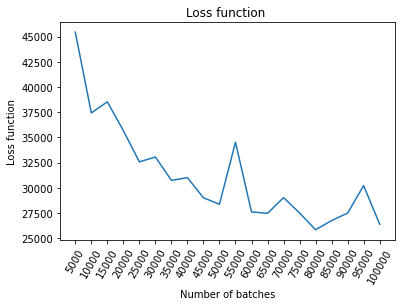

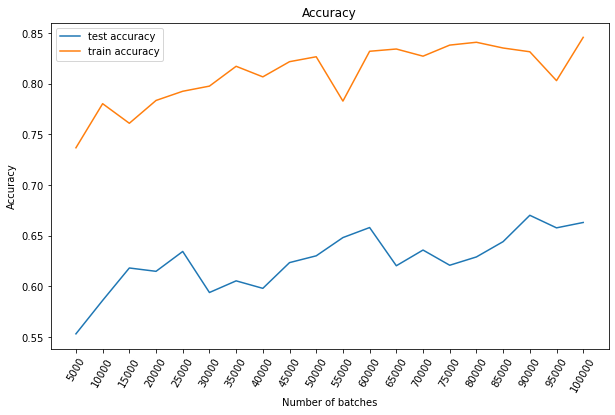

In [56]:
# plotting the loss function and test accuracy corresponding to the number of batches
import matplotlib.pyplot as plt
plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()


# MLP with 2 Hidden layers activation function ReLU( with 20000 iterations,50000 iterations and 100000 iterations)

C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\1511432441.py:74: RuntimeWarning: overflow encountered in exp
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\1511432441.py:74: RuntimeWarning: invalid value encountered in multiply
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\1511432441.py:77: RuntimeWarning: divide by zero encountered in log
  return -np.log(v[y])


Accuarcy:  0.5236
Accuarcy:  0.5020833333333333
iteration 5000, loss = 77859.31367422362, test = 0.5236,train=0.5020833333333333
Accuarcy:  0.5293
Accuarcy:  0.5547833333333333
iteration 10000, loss = 66417.8008600144, test = 0.5293,train=0.5547833333333333
Accuarcy:  0.5392
Accuarcy:  0.6767833333333333
iteration 15000, loss = 53207.24656854784, test = 0.5392,train=0.6767833333333333
Accuarcy:  0.5363
Accuarcy:  0.70965
iteration 20000, loss = 45923.22335665798, test = 0.5363,train=0.70965
Accuarcy:  0.7017
Accuarcy:  0.70965


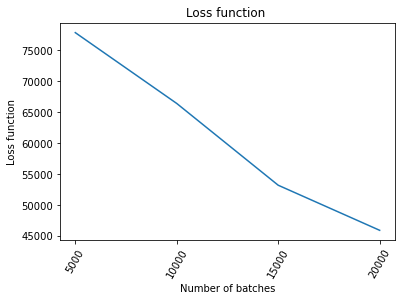

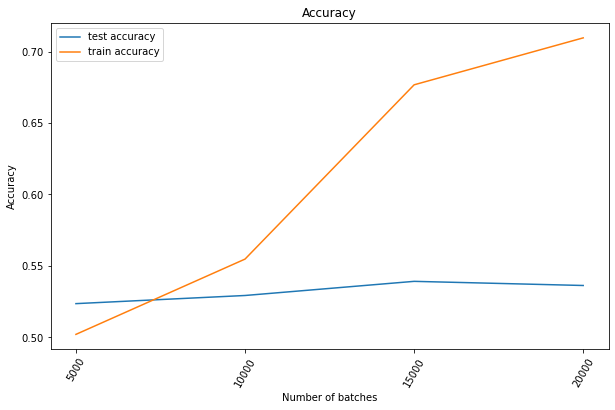

In [18]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255

x_ttest = x_test / 255




class mlp:
    hidden_1_layer = {}
    hidden_2_layer = {}
    output_layer = {}

    def __init__(self, x, layer, y):
        
        
        self.hidden_1_layer['parameter'] = np.random.randn(layer,x) / np.sqrt(num_x)
        self.hidden_1_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.hidden_2_layer['parameter'] = np.random.randn(layer,layer) / np.sqrt(layer)
        self.hidden_2_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.output_layer['parameter'] = np.random.randn(y,layer) / np.sqrt(layer)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(layer)
        
        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        return r
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    
 

    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        Hidden_lay_1 = np.matmul(self.hidden_1_layer['parameter'],x).reshape((self.hid_size,1)) + self.hidden_1_layer['bias']
        Hidden_l1 = np.array(self.ReLU(Hidden_lay_1)).reshape((self.hid_size,1))
        
        Hidden_lay_2 = np.matmul(self.hidden_2_layer['parameter'],Hidden_l1).reshape((self.hid_size,1)) + self.hidden_2_layer['bias']
        Hidden_l = np.array(self.ReLU(Hidden_lay_2)).reshape((self.hid_size,1))
        
        out_lay = np.matmul(self.output_layer['parameter'],Hidden_l).reshape((self.output_size,1)) + self.output_layer['bias']
        predict_r = np.squeeze(self.Softmax(out_lay))
        error = self.cross_entropy(predict_r,y)
        values=[Hidden_lay_1,Hidden_l,Hidden_lay_2,Hidden_l,out_lay,predict_r,error]
        keys= ['Hidden_lay_1','Hidden_l1','Hidden_lay_2','Hidden_l','out_lay','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       


        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['Hidden_l'].transpose())
        delta = np.matmul(self.output_layer['parameter'].transpose(),dU)
        db_2 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay_2']).reshape(self.hid_size,1)
        dV = np.matmul(db_2.reshape((self.hid_size,1)),forward_pr['Hidden_l'].reshape((1,128)))
        
        
     
        dC1 = np.matmul(db_2,forward_pr['Hidden_l1'].transpose())
        delta = np.matmul(self.hidden_2_layer['parameter'].transpose(),db_2)
        db_1 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay_1']).reshape(self.hid_size,1)
        dW = np.matmul(db_1.reshape((self.hid_size,1)),x.reshape((1,784)))
        
        values = [dC,db_2,db_1,dW,dV,dU]
        keys = ['dC','db_2','db_1','dW','dv','du']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):
        # update the hyperparameters
        self.output_layer['parameter'] -= learning_rate*b_result['dC']
        self.output_layer['bias'] -= learning_rate*b_result['du']
        
        self.hidden_2_layer['bias'] -= learning_rate*b_result['db_2']
        self.hidden_2_layer['parameter'] -= learning_rate*b_result['dv']
        
        self.hidden_1_layer['bias'] -= learning_rate*b_result['db_1']
        self.hidden_1_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_iterations = 1000, learning_rate = 0.5):
        # generate a random list of indices for the training set
        rand_indices = np.random.choice(len(X_train), num_iterations, replace=True)
        
        def l_rate(base_rate, ite, num_iterations, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_iterations*5))
            else:
                return base_rate

        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))
            

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X, Y):
        # test the model on the training dataset
        total_correct = 0
        for n in range(len(X)):
            y = Y[n]
            x = X[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy: ',total_correct/len(X))
        return total_correct/np.float(len(X))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 20000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_iterations=num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test)
accu_train = model.predict(x_ttrain,y_train)

import matplotlib.pyplot as plt
plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()


C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\3599231369.py:73: RuntimeWarning: overflow encountered in exp
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\3599231369.py:73: RuntimeWarning: invalid value encountered in multiply
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25072\3599231369.py:76: RuntimeWarning: divide by zero encountered in log
  return -np.log(v[y])


Accuarcy:  0.5062
Accuarcy:  0.6206666666666667
iteration 5000, loss = 58708.09873130544, test accuracy= 0.5062,train accuracy=0.6206666666666667
Accuarcy:  0.5444
Accuarcy:  0.7163166666666667
iteration 10000, loss = 44968.55934701997, test accuracy= 0.5444,train accuracy=0.7163166666666667
Accuarcy:  0.5415
Accuarcy:  0.7435833333333334
iteration 15000, loss = 40291.491727397966, test accuracy= 0.5415,train accuracy=0.7435833333333334
Accuarcy:  0.5756
Accuarcy:  0.6731333333333334
iteration 20000, loss = 46985.46039261013, test accuracy= 0.5756,train accuracy=0.6731333333333334
Accuarcy:  0.6129
Accuarcy:  0.7399166666666667
iteration 25000, loss = 39330.23174154103, test accuracy= 0.6129,train accuracy=0.7399166666666667
Accuarcy:  0.5987
Accuarcy:  0.7610666666666667
iteration 30000, loss = 37255.601347691416, test accuracy= 0.5987,train accuracy=0.7610666666666667
Accuarcy:  0.573
Accuarcy:  0.7594333333333333
iteration 35000, loss = 39259.71497235191, test accuracy= 0.573,train 

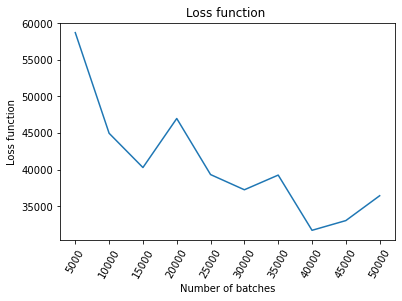

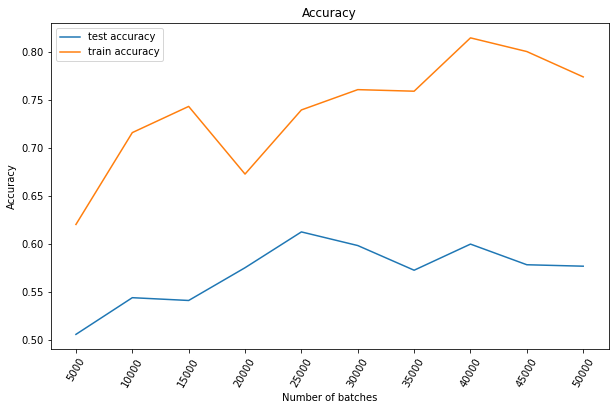

In [20]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255
x_ttest = x_test / 255




class mlp:
    hidden_1_layer = {}
    hidden_2_layer = {}
    output_layer = {}

    def __init__(self, x, layer, y):
        
        
        self.hidden_1_layer['parameter'] = np.random.randn(layer,x) / np.sqrt(num_x)
        self.hidden_1_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.hidden_2_layer['parameter'] = np.random.randn(layer,layer) / np.sqrt(layer)
        self.hidden_2_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.output_layer['parameter'] = np.random.randn(y,layer) / np.sqrt(layer)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(layer)
        
        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        return r
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    
 

    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        Hidden_lay_1 = np.matmul(self.hidden_1_layer['parameter'],x).reshape((self.hid_size,1)) + self.hidden_1_layer['bias']
        Hidden_l1 = np.array(self.ReLU(Hidden_lay_1)).reshape((self.hid_size,1))
        
        Hidden_lay_2 = np.matmul(self.hidden_2_layer['parameter'],Hidden_l1).reshape((self.hid_size,1)) + self.hidden_2_layer['bias']
        Hidden_l = np.array(self.ReLU(Hidden_lay_2)).reshape((self.hid_size,1))
        
        out_lay = np.matmul(self.output_layer['parameter'],Hidden_l).reshape((self.output_size,1)) + self.output_layer['bias']
        predict_r = np.squeeze(self.Softmax(out_lay))
        error = self.cross_entropy(predict_r,y)
        values=[Hidden_lay_1,Hidden_l,Hidden_lay_2,Hidden_l,out_lay,predict_r,error]
        keys= ['Hidden_lay_1','Hidden_l1','Hidden_lay_2','Hidden_l','out_lay','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       


        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['Hidden_l'].transpose())
        delta = np.matmul(self.output_layer['parameter'].transpose(),dU)
        db_2 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay_2']).reshape(self.hid_size,1)
        dV = np.matmul(db_2.reshape((self.hid_size,1)),forward_pr['Hidden_l'].reshape((1,128)))
        
        
     
        dC1 = np.matmul(db_2,forward_pr['Hidden_l1'].transpose())
        delta = np.matmul(self.hidden_2_layer['parameter'].transpose(),db_2)
        db_1 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay_1']).reshape(self.hid_size,1)
        dW = np.matmul(db_1.reshape((self.hid_size,1)),x.reshape((1,784)))
        
        values = [dC,db_2,db_1,dW,dV,dU]
        keys = ['dC','db_2','db_1','dW','dv','du']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):
        # update the hyperparameters
        self.output_layer['parameter'] -= learning_rate*b_result['dC']
        self.output_layer['bias'] -= learning_rate*b_result['du']
        
        self.hidden_2_layer['bias'] -= learning_rate*b_result['db_2']
        self.hidden_2_layer['parameter'] -= learning_rate*b_result['dv']
        
        self.hidden_1_layer['bias'] -= learning_rate*b_result['db_1']
        self.hidden_1_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_iterations = 1000, learning_rate = 0.5):
        # generate a random list of indices for the training set
        rand_indices = np.random.choice(len(X_train), num_iterations, replace=True)
        
        def l_rate(base_rate, ite, num_iterations, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_iterations*5))
            else:
                return base_rate

        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))
            

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test accuracy= {},train accuracy={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X, Y):
        # test the model on the training dataset
        total_correct = 0
        for n in range(len(X)):
            y = Y[n]
            x = X[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy: ',total_correct/len(X))
        return total_correct/np.float(len(X))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 50000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_iterations=num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test)
accu_train = model.predict(x_ttrain,y_train)

plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()


In [57]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255

x_ttest = x_test / 255




class mlp:
    hidden_1_layer = {}
    hidden_2_layer = {}
    output_layer = {}

    def __init__(self, x, layer, y):
        
        
        self.hidden_1_layer['parameter'] = np.random.randn(layer,x) / np.sqrt(num_x)
        self.hidden_1_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.hidden_2_layer['parameter'] = np.random.randn(layer,layer) / np.sqrt(layer)
        self.hidden_2_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.output_layer['parameter'] = np.random.randn(y,layer) / np.sqrt(layer)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(layer)
        
        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        return r
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    
 

    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        Hidden_lay_1 = np.matmul(self.hidden_1_layer['parameter'],x).reshape((self.hid_size,1)) + self.hidden_1_layer['bias']
        Hidden_l1 = np.array(self.ReLU(Hidden_lay_1)).reshape((self.hid_size,1))
        
        Hidden_lay_2 = np.matmul(self.hidden_2_layer['parameter'],Hidden_l1).reshape((self.hid_size,1)) + self.hidden_2_layer['bias']
        Hidden_l = np.array(self.ReLU(Hidden_lay_2)).reshape((self.hid_size,1))
        
        out_lay = np.matmul(self.output_layer['parameter'],Hidden_l).reshape((self.output_size,1)) + self.output_layer['bias']
        predict_r = np.squeeze(self.Softmax(out_lay))
        error = self.cross_entropy(predict_r,y)
        values=[Hidden_lay_1,Hidden_l,Hidden_lay_2,Hidden_l,out_lay,predict_r,error]
        keys= ['Hidden_lay_1','Hidden_l1','Hidden_lay_2','Hidden_l','out_lay','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       


        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['Hidden_l'].transpose())
        delta = np.matmul(self.output_layer['parameter'].transpose(),dU)
        db_2 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay_2']).reshape(self.hid_size,1)
        dV = np.matmul(db_2.reshape((self.hid_size,1)),forward_pr['Hidden_l'].reshape((1,128)))
        
        
     
        dC1 = np.matmul(db_2,forward_pr['Hidden_l1'].transpose())
        delta = np.matmul(self.hidden_2_layer['parameter'].transpose(),db_2)
        db_1 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay_1']).reshape(self.hid_size,1)
        dW = np.matmul(db_1.reshape((self.hid_size,1)),x.reshape((1,784)))
        
        values = [dC,db_2,db_1,dW,dV,dU]
        keys = ['dC','db_2','db_1','dW','dv','du']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):
        # update the hyperparameters
        self.output_layer['parameter'] -= learning_rate*b_result['dC']
        self.output_layer['bias'] -= learning_rate*b_result['du']
        
        self.hidden_2_layer['bias'] -= learning_rate*b_result['db_2']
        self.hidden_2_layer['parameter'] -= learning_rate*b_result['dv']
        
        self.hidden_1_layer['bias'] -= learning_rate*b_result['db_1']
        self.hidden_1_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_iterations = 1000, learning_rate = 0.5):
        # generate a random list of indices for the training set
        rand_indices = np.random.choice(len(X_train), num_iterations, replace=True)
        
        def l_rate(base_rate, ite, num_iterations, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_iterations*5))
            else:
                return base_rate

        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))
            

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X_test, Y_test):
        # test the model on the training dataset
        total_correct = 0
        for n in range(len(X_test)):
            y = Y_test[n]
            x = X_test[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy: ',total_correct/np.float(len(X_test)))
        return total_correct/np.float(len(X_test))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 100000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_iterations=num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test)
accu_train = model.predict(x_ttrain,y_train)


C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25388\3488010856.py:74: RuntimeWarning: overflow encountered in exp
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25388\3488010856.py:74: RuntimeWarning: invalid value encountered in multiply
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_25388\3488010856.py:77: RuntimeWarning: divide by zero encountered in log
  return -np.log(v[y])


Accuarcy:  0.5765
Accuarcy:  0.7160666666666666
iteration 5000, loss = 44871.12980495434, test = 0.5765,train=0.7160666666666666
Accuarcy:  0.5955
Accuarcy:  0.7636
iteration 10000, loss = 39108.94264417684, test = 0.5955,train=0.7636
Accuarcy:  0.5959
Accuarcy:  0.7345666666666667
iteration 15000, loss = 39889.74730814476, test = 0.5959,train=0.7345666666666667
Accuarcy:  0.5727
Accuarcy:  0.81285
iteration 20000, loss = 30861.950549261823, test = 0.5727,train=0.81285
Accuarcy:  0.56
Accuarcy:  0.8011166666666667
iteration 25000, loss = 34000.993087978124, test = 0.56,train=0.8011166666666667
Accuarcy:  0.6238
Accuarcy:  0.8125166666666667
iteration 30000, loss = 30876.909525725074, test = 0.6238,train=0.8125166666666667
Accuarcy:  0.6193
Accuarcy:  0.81105
iteration 35000, loss = 30828.32755571742, test = 0.6193,train=0.81105
Accuarcy:  0.6264
Accuarcy:  0.8256833333333333
iteration 40000, loss = 29344.25473601669, test = 0.6264,train=0.8256833333333333
Accuarcy:  0.5831
Accuarcy:  0

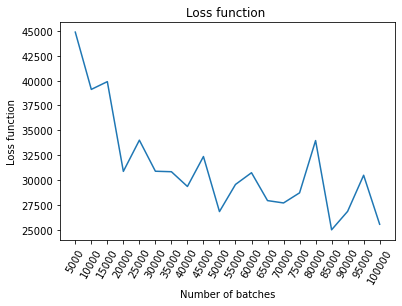

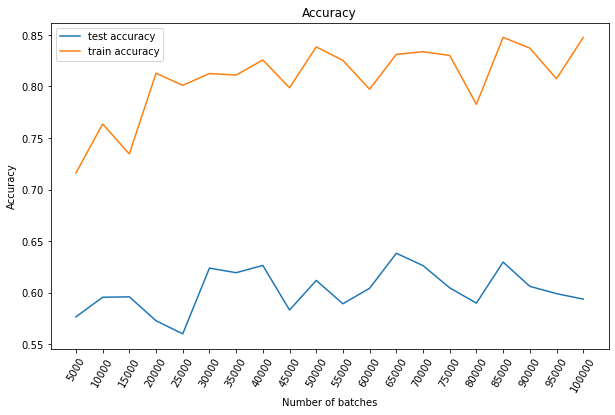

In [59]:
import matplotlib.pyplot as plt
plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()

# MLP with 2 Hidden layers activation function ReLU with drop out

C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\3449991252.py:74: RuntimeWarning: overflow encountered in exp
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\3449991252.py:74: RuntimeWarning: invalid value encountered in multiply
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\3449991252.py:77: RuntimeWarning: divide by zero encountered in log
  return -np.log(v[y])


Accuarcy:  0.4941
Accuarcy:  0.6702166666666667
iteration 5000, loss = 59908.278333078815, test = 0.4941,train=0.6702166666666667
Accuarcy:  0.5434
Accuarcy:  0.69595
iteration 10000, loss = 46948.83504022243, test = 0.5434,train=0.69595
Accuarcy:  0.5588
Accuarcy:  0.7357833333333333
iteration 15000, loss = 43830.9239731534, test = 0.5588,train=0.7357833333333333
Accuarcy:  0.5359
Accuarcy:  0.7975166666666667
iteration 20000, loss = 34202.08921066669, test = 0.5359,train=0.7975166666666667
Accuarcy:  0.5509
Accuarcy:  0.7426666666666667
iteration 25000, loss = 39792.326896879895, test = 0.5509,train=0.7426666666666667
Accuarcy:  0.5921
Accuarcy:  0.7984833333333333
iteration 30000, loss = 33566.92140096327, test = 0.5921,train=0.7984833333333333
Accuarcy:  0.5536
Accuarcy:  0.7167833333333333
iteration 35000, loss = 42984.445587740636, test = 0.5536,train=0.7167833333333333
Accuarcy:  0.5825
Accuarcy:  0.8027166666666666
iteration 40000, loss = 33817.6875858656, test = 0.5825,train=0

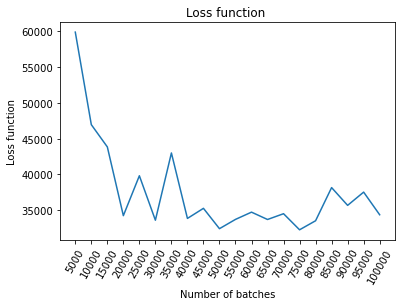

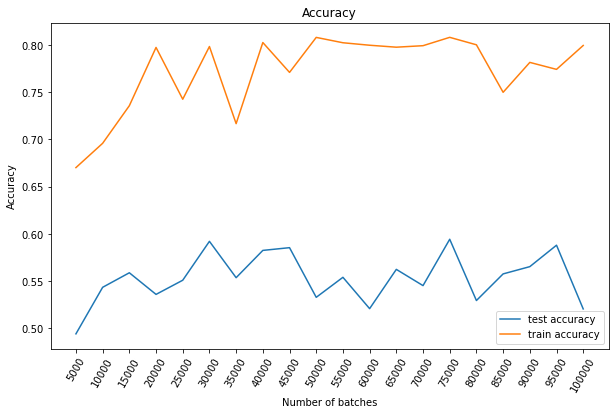

In [32]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255

x_ttest = x_test / 255




class mlp:
    hidden_1_layer = {}
    hidden_2_layer = {}
    output_layer = {}

    def __init__(self, x, layer, y):
        
        
        self.hidden_1_layer['parameter'] = np.random.randn(layer,x) / np.sqrt(num_x)
        self.hidden_1_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.hidden_2_layer['parameter'] = np.random.randn(layer,layer) / np.sqrt(layer)
        self.hidden_2_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.output_layer['parameter'] = np.random.randn(y,layer) / np.sqrt(layer)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(layer)
        
        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        return r
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    
    def dropout_layer(self,X, dropout=0.5):
        assert 0 <= dropout <= 1
        # In this case, all elements are dropped out
        if dropout == 1:
            return np.zeros_like(X)
        # In this case, all elements are kept
        if dropout == 0:
            return X
        mask = np.random.uniform(0, 1, X.shape) > dropout
        return mask.astype(np.float32) * X / (1.0 - dropout)
 

    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        Hidden_lay_1 = np.matmul(self.hidden_1_layer['parameter'],x).reshape((self.hid_size,1)) + self.hidden_1_layer['bias']
        Hidden_l1 = np.array(self.ReLU(Hidden_lay_1)).reshape((self.hid_size,1))
        Hidden_l1=self.dropout_layer(Hidden_l1,dropout=0.1)
        
        Hidden_lay_2 = np.matmul(self.hidden_2_layer['parameter'],Hidden_l1).reshape((self.hid_size,1)) + self.hidden_2_layer['bias']
        Hidden_l = np.array(self.ReLU(Hidden_lay_2)).reshape((self.hid_size,1))
        Hidden_l=self.dropout_layer(Hidden_l,dropout=0.1)
        out_lay = np.matmul(self.output_layer['parameter'],Hidden_l).reshape((self.output_size,1)) + self.output_layer['bias']
        predict_r = np.squeeze(self.Softmax(out_lay))
        error = self.cross_entropy(predict_r,y)
        values=[Hidden_lay_1,Hidden_l,Hidden_lay_2,Hidden_l,out_lay,predict_r,error]
        keys= ['Hidden_lay_1','Hidden_l1','Hidden_lay_2','Hidden_l','out_lay','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       


        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['Hidden_l'].transpose())
        delta = np.matmul(self.output_layer['parameter'].transpose(),dU)
        db_2 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay_2']).reshape(self.hid_size,1)
        dV = np.matmul(db_2.reshape((self.hid_size,1)),forward_pr['Hidden_l'].reshape((1,128)))
        
        
     
        dC1 = np.matmul(db_2,forward_pr['Hidden_l1'].transpose())
        delta = np.matmul(self.hidden_2_layer['parameter'].transpose(),db_2)
        db_1 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay_1']).reshape(self.hid_size,1)
        dW = np.matmul(db_1.reshape((self.hid_size,1)),x.reshape((1,784)))
        
        values = [dC,db_2,db_1,dW,dV,dU]
        keys = ['dC','db_2','db_1','dW','dv','du']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):
        # update the hyperparameters
        self.output_layer['parameter'] -= learning_rate*b_result['dC']
        self.output_layer['bias'] -= learning_rate*b_result['du']
        
        self.hidden_2_layer['bias'] -= learning_rate*b_result['db_2']
        self.hidden_2_layer['parameter'] -= learning_rate*b_result['dv']
        
        self.hidden_1_layer['bias'] -= learning_rate*b_result['db_1']
        self.hidden_1_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_iterations = 1000, learning_rate = 0.5):
        # generate a random list of indices for the training set
        rand_indices = np.random.choice(len(X_train), num_iterations, replace=True)
        
        def l_rate(base_rate, ite, num_iterations, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_iterations*5))
            else:
                return base_rate

        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))
            

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X_test, Y_test):
        # test the model on the training dataset
        total_correct = 0
        for n in range(len(X_test)):
            y = Y_test[n]
            x = X_test[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy: ',total_correct/len(X_test))
        return total_correct/np.float(len(X_test))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 100000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_iterations=num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test)
accu_train = model.predict(x_ttrain,y_train)

plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()


# Model with 2 hidden layers (leaky ReLU)

C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\706589947.py:75: RuntimeWarning: overflow encountered in exp
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\706589947.py:75: RuntimeWarning: invalid value encountered in multiply
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\706589947.py:78: RuntimeWarning: divide by zero encountered in log
  return -np.log(v[y])


Accuarcy  :  0.5526
Accuarcy  :  0.71465
iteration 5000, loss = 47433.0844832464, test = 0.5526,train=0.71465
Accuarcy  :  0.5708
Accuarcy  :  0.7240333333333333
iteration 10000, loss = 44330.49403119773, test = 0.5708,train=0.7240333333333333
Accuarcy  :  0.6313
Accuarcy  :  0.7861166666666667
iteration 15000, loss = 36107.999028325845, test = 0.6313,train=0.7861166666666667
Accuarcy  :  0.5523
Accuarcy  :  0.7526166666666667
iteration 20000, loss = 38561.33129036858, test = 0.5523,train=0.7526166666666667
Accuarcy  :  0.5435
Accuarcy  :  0.7387
iteration 25000, loss = 40620.02582955113, test = 0.5435,train=0.7387
Accuarcy  :  0.6082
Accuarcy  :  0.7892833333333333
iteration 30000, loss = 34332.75486263643, test = 0.6082,train=0.7892833333333333
Accuarcy  :  0.6302
Accuarcy  :  0.8075666666666667
iteration 35000, loss = 30615.34279030054, test = 0.6302,train=0.8075666666666667
Accuarcy  :  0.604
Accuarcy  :  0.7899833333333334
iteration 40000, loss = 33566.14018559032, test = 0.604,tr

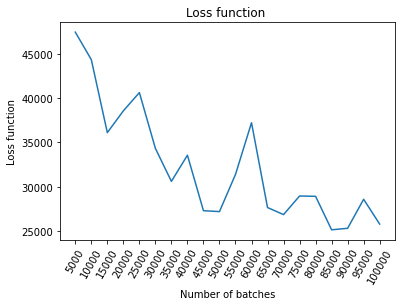

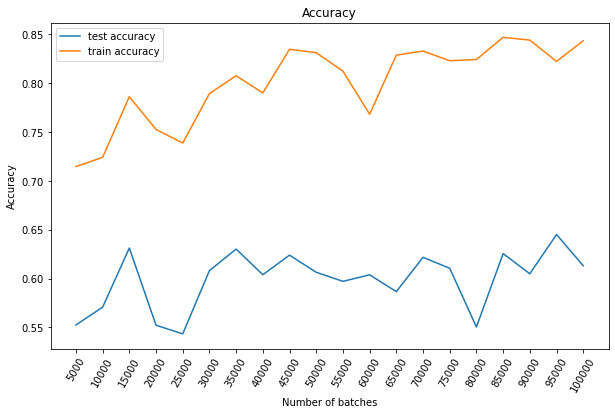

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255

x_ttest = x_test / 255




class mlp:
    hidden_1_layer = {}
    hidden_2_layer = {}
    output_layer = {}

    def __init__(self, x, layer, y):
        
        
        self.hidden_1_layer['parameter'] = np.random.randn(layer,x) / np.sqrt(num_x)
        self.hidden_1_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.hidden_2_layer['parameter'] = np.random.randn(layer,layer) / np.sqrt(layer)
        self.hidden_2_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.output_layer['parameter'] = np.random.randn(y,layer) / np.sqrt(layer)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(layer)
        
        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        return r
    
    def leaky_ReLU(self,x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)



    def derivative_leaky_ReLU(self,x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    
 

    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        Hidden_lay_1 = np.matmul(self.hidden_1_layer['parameter'],x).reshape((self.hid_size,1)) + self.hidden_1_layer['bias']
        Hidden_l1 = np.array(self.leaky_ReLU(Hidden_lay_1)).reshape((self.hid_size,1))
        
        Hidden_lay_2 = np.matmul(self.hidden_2_layer['parameter'],Hidden_l1).reshape((self.hid_size,1)) + self.hidden_2_layer['bias']
        Hidden_l = np.array(self.leaky_ReLU(Hidden_lay_2)).reshape((self.hid_size,1))
        
        out_lay = np.matmul(self.output_layer['parameter'],Hidden_l).reshape((self.output_size,1)) + self.output_layer['bias']
        predict_r = np.squeeze(self.Softmax(out_lay))
        error = self.cross_entropy(predict_r,y)
        values=[Hidden_lay_1,Hidden_l,Hidden_lay_2,Hidden_l,out_lay,predict_r,error]
        keys= ['Hidden_lay_1','Hidden_l1','Hidden_lay_2','Hidden_l','out_lay','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       


        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['Hidden_l'].transpose())
        delta = np.matmul(self.output_layer['parameter'].transpose(),dU)
        db_2 = delta.reshape(self.hid_size,1)*self.derivative_leaky_ReLU(forward_pr['Hidden_lay_2']).reshape(self.hid_size,1)
        dV = np.matmul(db_2.reshape((self.hid_size,1)),forward_pr['Hidden_l'].reshape((1,128)))
        
        
     
        dC1 = np.matmul(db_2,forward_pr['Hidden_l1'].transpose())
        delta = np.matmul(self.hidden_2_layer['parameter'].transpose(),db_2)
        db_1 = delta.reshape(self.hid_size,1)*self.derivative_leaky_ReLU(forward_pr['Hidden_lay_1']).reshape(self.hid_size,1)
        dW = np.matmul(db_1.reshape((self.hid_size,1)),x.reshape((1,784)))
        
        values = [dC,db_2,db_1,dW,dV,dU]
        keys = ['dC','db_2','db_1','dW','dv','du']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):
        # update the hyperparameters
        self.output_layer['parameter'] -= learning_rate*b_result['dC']
        self.output_layer['bias'] -= learning_rate*b_result['du']
        
        self.hidden_2_layer['bias'] -= learning_rate*b_result['db_2']
        self.hidden_2_layer['parameter'] -= learning_rate*b_result['dv']
        
        self.hidden_1_layer['bias'] -= learning_rate*b_result['db_1']
        self.hidden_1_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_iterations = 1000, learning_rate = 0.5):
        # generate a random list of indices for the training set
        rand_indices = np.random.choice(len(X_train), num_iterations, replace=True)
        
        def l_rate(base_rate, ite, num_iterations, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_iterations*5))
            else:
                return base_rate
        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))
            

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict


    def predict(self,X, Y,type=''):
        # test the model on the training dataset
        total_correct = 0
        for n in range(len(X)):
            y = Y[n]
            x = X[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print(f'Accuarcy {type} : ' ,total_correct/len(X))
        return total_correct/np.float(len(X))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################


num_batches = 100000
learning_rate = 0.01
num_x = 28*28
num_y = 10
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test,'Test')
accu_train = model.predict(x_ttrain,y_train,'Train')


plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()

# model with two hidden layers without normalization

C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\630244255.py:66: RuntimeWarning: overflow encountered in exp
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\630244255.py:66: RuntimeWarning: invalid value encountered in multiply
  return 1/sum(np.exp(z)) * np.exp(z)


Accuarcy Test:  0.1
Accuarcy Test:  0.1
iteration 5000, loss = nan, test = 0.1,train=0.1
Accuarcy Test:  0.1
Accuarcy Test:  0.1
iteration 10000, loss = nan, test = 0.1,train=0.1
Accuarcy Test:  0.1
Accuarcy Test:  0.1
iteration 15000, loss = nan, test = 0.1,train=0.1
Accuarcy Test:  0.1
Accuarcy Test:  0.1
iteration 20000, loss = nan, test = 0.1,train=0.1
Accuarcy Test:  0.1
Accuarcy Test:  0.1
iteration 25000, loss = nan, test = 0.1,train=0.1
Accuarcy Test:  0.1
Accuarcy Test:  0.1
iteration 30000, loss = nan, test = 0.1,train=0.1
Accuarcy Test:  0.1
Accuarcy Test:  0.1
iteration 35000, loss = nan, test = 0.1,train=0.1
Accuarcy Test:  0.1
Accuarcy Test:  0.1
iteration 40000, loss = nan, test = 0.1,train=0.1
Accuarcy Test:  0.1
Accuarcy Test:  0.1
iteration 45000, loss = nan, test = 0.1,train=0.1
Accuarcy Test:  0.1
Accuarcy Test:  0.1
iteration 50000, loss = nan, test = 0.1,train=0.1
Accuarcy Test:  0.1
Accuarcy Test:  0.1
iteration 55000, loss = nan, test = 0.1,train=0.1
Accuarcy Te

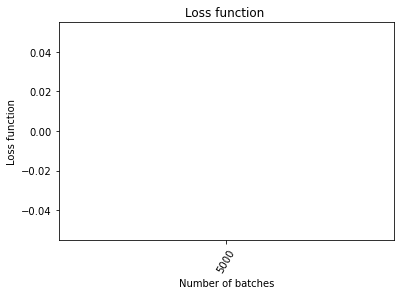

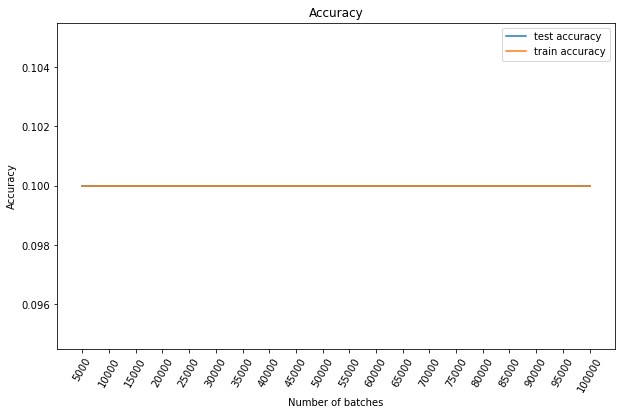

In [39]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28) 

 

class mlp:
    hidden_1_layer = {}
    hidden_2_layer = {}
    output_layer = {}

    def __init__(self, x, layer, y):
        
        
        self.hidden_1_layer['parameter'] = np.random.randn(layer,x) / np.sqrt(num_x)
        self.hidden_1_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.hidden_2_layer['parameter'] = np.random.randn(layer,layer) / np.sqrt(layer)
        self.hidden_2_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.output_layer['parameter'] = np.random.randn(y,layer) / np.sqrt(layer)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(layer)
        
        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        return r
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    
 

    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        Hidden_lay_1 = np.matmul(self.hidden_1_layer['parameter'],x).reshape((self.hid_size,1)) + self.hidden_1_layer['bias']
        Hidden_l1 = np.array(self.ReLU(Hidden_lay_1)).reshape((self.hid_size,1))
        
        Hidden_lay_2 = np.matmul(self.hidden_2_layer['parameter'],Hidden_l1).reshape((self.hid_size,1)) + self.hidden_2_layer['bias']
        Hidden_l = np.array(self.ReLU(Hidden_lay_2)).reshape((self.hid_size,1))
        
        out_lay = np.matmul(self.output_layer['parameter'],Hidden_l).reshape((self.output_size,1)) + self.output_layer['bias']
        predict_r = np.squeeze(self.Softmax(out_lay))
        error = self.cross_entropy(predict_r,y)
        values=[Hidden_lay_1,Hidden_l,Hidden_lay_2,Hidden_l,out_lay,predict_r,error]
        keys= ['Hidden_lay_1','Hidden_l1','Hidden_lay_2','Hidden_l','out_lay','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       


        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
#         print(E[0][y])
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
#         db_21 = copy.copy(dU)
        dC = np.matmul(dU,forward_pr['Hidden_l'].transpose())
        delta = np.matmul(self.output_layer['parameter'].transpose(),dU)
        db_2 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay_2']).reshape(self.hid_size,1)
        dV = np.matmul(db_2.reshape((self.hid_size,1)),forward_pr['Hidden_l'].reshape((1,128)))
        
        
     
        dC1 = np.matmul(db_2,forward_pr['Hidden_l1'].transpose())
        delta = np.matmul(self.hidden_2_layer['parameter'].transpose(),db_2)
        db_1 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay_1']).reshape(self.hid_size,1)
        dW = np.matmul(db_1.reshape((self.hid_size,1)),x.reshape((1,784)))
        
        values = [dC,db_2,db_1,dW,dV,dU]
        keys = ['dC','db_2','db_1','dW','dv','du']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):
        # update the hyperparameters
        self.output_layer['parameter'] -= learning_rate*b_result['dC']
        self.output_layer['bias'] -= learning_rate*b_result['du']
        
        self.hidden_2_layer['bias'] -= learning_rate*b_result['db_2']
        self.hidden_2_layer['parameter'] -= learning_rate*b_result['dv']
        
        self.hidden_1_layer['bias'] -= learning_rate*b_result['db_1']
        self.hidden_1_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_iterations = 1000, learning_rate = 0.5):
        # generate a random list of indices for the training set
        rand_indices = np.random.choice(len(X_train), num_iterations, replace=True)
        
        def l_rate(base_rate, ite, num_iterations, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_iterations*5))
            else:
                return base_rate

        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))
            

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X_test, Y_test):
        # test the model on the training dataset
        total_correct = 0
        for n in range(len(X_test)):
            y = Y_test[n]
            x = X_test[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy Test: ',total_correct/len(X_test))
        return total_correct/np.float(len(X_test))
     
    def predictt(self,X, Y):
        # test the model on the training dataset
        total_correct = 0
        for n in range(len(X)):
            y = Y[n]
            x = X[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy Train: ',total_correct/len(X_test))
        return total_correct/np.float(len(X_test))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 100000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_train,y_train,num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_test,y_test)
accu_train = model.predictt(x_train,y_train)



import matplotlib.pyplot as plt
plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()

# Convolutional Neural Network (CNN) with 2 convolutional and 2 fully connected layers(128)

In [17]:

model = tf.keras.models.Sequential()


model.add(
    tf.keras.layers.Conv2D(
        filters=128, 
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid', 
        activation='leaky_relu', 
        input_shape=(28, 28, 1) 
    )
)
    
model.add(tf.keras.layers.Conv2D(
        filters=128,  
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid',
        activation='leaky_relu', 
        input_shape=(28, 28, 1) 
    )
) 


model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), 
        strides=(2, 2) 
    )
)
          

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 
    )
)

model.add(
    tf.keras.layers.Flatten()
)

model.add(
    tf.keras.layers.Dense(
        units=128, 
        activation='relu' 
    )
)


model.add(
    tf.keras.layers.Dense(
        units=10,
        activation='softmax' 
    )
)

# Build the model
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy'] 
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [10]:
# Add an empty color dimension as the Convolutional net is expecting this
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()


print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

# Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
x_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(X_test, -1)

history = model.fit(

      x_train, Y_train,

      batch_size=256, 

      epochs=10, 

      validation_split=0.2, 

      verbose=1) 

Epoch 1/10
188/188 [==============================] - 16s 85ms/step - loss: 0.1741 - accuracy: 0.9339 - val_loss: 0.2963 - val_accuracy: 0.9041
Epoch 2/10
188/188 [==============================] - 17s 89ms/step - loss: 0.1669 - accuracy: 0.9374 - val_loss: 0.3015 - val_accuracy: 0.9014
Epoch 3/10
188/188 [==============================] - 16s 87ms/step - loss: 0.1573 - accuracy: 0.9396 - val_loss: 0.3054 - val_accuracy: 0.9043
Epoch 4/10
188/188 [==============================] - 17s 88ms/step - loss: 0.1493 - accuracy: 0.9434 - val_loss: 0.3256 - val_accuracy: 0.9025
Epoch 5/10
188/188 [==============================] - 16s 85ms/step - loss: 0.1439 - accuracy: 0.9461 - val_loss: 0.3113 - val_accuracy: 0.9048
Epoch 6/10
188/188 [==============================] - 16s 85ms/step - loss: 0.1427 - accuracy: 0.9461 - val_loss: 0.3133 - val_accuracy: 0.9063
Epoch 7/10
188/188 [==============================] - 16s 84ms/step - loss: 0.1332 - accuracy: 0.9495 - val_loss: 0.3137 - val_accuracy:

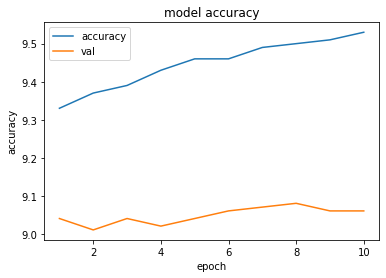

In [2]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val'], loc='upper left')
plt.show()

# Convolutional Neural Network (CNN) with 2 convolutional and 2 fully connected layers(256 units) with leaky relu

In [25]:

model = tf.keras.models.Sequential()


model.add(
    tf.keras.layers.Conv2D(
        filters=256, 
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid', 
        activation='leaky_relu', 
        input_shape=(28, 28, 1) 
    )
)
    
model.add(tf.keras.layers.Conv2D(
        filters=256, 
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid', 
        activation='leaky_relu', 
        input_shape=(28, 28, 1) 
    )
) 

model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), 
        strides=(2, 2) 
    )
)
          
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 
    )
)


model.add(
    tf.keras.layers.Flatten()
)


model.add(
    tf.keras.layers.Dense(
        units=128,
        activation='relu' 
    )
)


model.add(
    tf.keras.layers.Dense(
        units=10,
        activation='softmax' 
    )
)


model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy'] 
)


model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4718720   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
Epoch 1/10
188/188 [==============================] - 901s 5s/step - loss: 6.6280 - accuracy: 0.7671 - val_loss: 0.3895 - val_accuracy: 0.8653
Epoch 2/10
188/188 [==============================] - 942s 5s/step - loss: 0.3769 - accuracy: 0.8701 - val_loss: 0.3803 - val_accuracy: 0.8635
Epoch 3/10
188/188 [==============================] - 980s 5s/step - loss: 0.3119 - accuracy: 0.8904 - val_loss: 0.3124 - val_accuracy: 0.8916
Epoch 4/10
188/188 [==============================] - 739s 4s/step - loss: 0.2640 - accuracy: 0.9052 - val_loss: 0.3140 - val_accuracy: 0.8898
Epoch 5/10
188/188 [==============================] - 852s 5s/step - loss: 0.2377 - accuracy: 0.9139 - val_loss: 0.2819 - val_accuracy: 0.9053
Epoch 6/10
188/188 [==============================] - 728s 4s/step - loss: 0.2154 - accuracy: 0.9214 - val_loss: 0.2751 - val_accuracy: 0.9068
Epoch 7/10
188/188 [=======

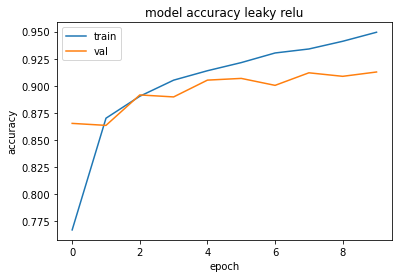

In [26]:

from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()


print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

# Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
x_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(X_test, -1)


history = model.fit(

      x_train, Y_train,
      batch_size=256, 

      epochs=10, 

      validation_split=0.2, 

      verbose=1) 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy leaky relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model with 2 hidden layers (Hyperbolic Tangent (tanh) Activation Function)

C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\2844098489.py:73: RuntimeWarning: overflow encountered in exp
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\2844098489.py:73: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))


Accuarcy:  0.6621
Accuarcy:  0.7372833333333333
iteration 5000, loss = 41498.22183160639, test = 0.6621,train=0.7372833333333333
Accuarcy:  0.3624
Accuarcy:  0.72475
iteration 10000, loss = 42679.44357436584, test = 0.3624,train=0.72475
Accuarcy:  0.3616
Accuarcy:  0.7905666666666666
iteration 15000, loss = 33016.44482874653, test = 0.3616,train=0.7905666666666666
Accuarcy:  0.3427
Accuarcy:  0.7974666666666667
iteration 20000, loss = 32938.322362715655, test = 0.3427,train=0.7974666666666667
Accuarcy:  0.2761
Accuarcy:  0.7959
iteration 25000, loss = 32479.47542321297, test = 0.2761,train=0.7959
Accuarcy:  0.2873
Accuarcy:  0.8062
iteration 30000, loss = 30953.77509929315, test = 0.2873,train=0.8062
Accuarcy:  0.2629
Accuarcy:  0.8252666666666667
iteration 35000, loss = 29135.14804076363, test = 0.2629,train=0.8252666666666667
Accuarcy:  0.2675
Accuarcy:  0.8298166666666666
iteration 40000, loss = 29481.73578111223, test = 0.2675,train=0.8298166666666666
Accuarcy:  0.2371
Accuarcy:  0

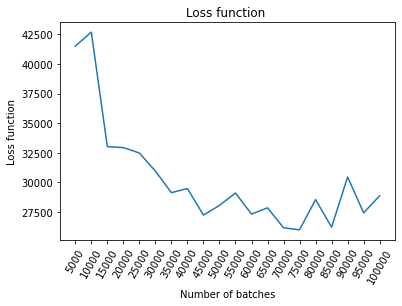

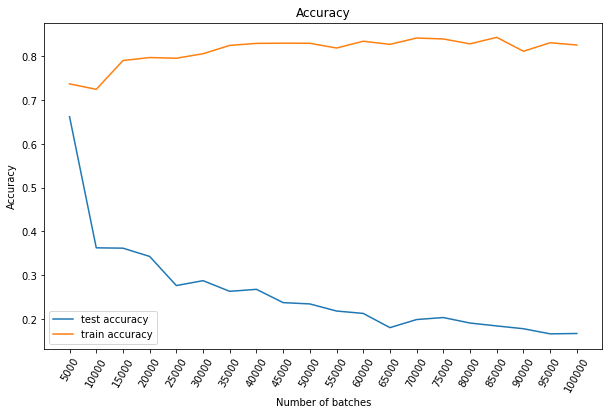

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255

x_ttest = x_test / 255




class mlp:
    hidden_1_layer = {}
    hidden_2_layer = {}
    output_layer = {}

    def __init__(self, x, layer, y):
        
        
        self.hidden_1_layer['parameter'] = np.random.randn(layer,x) / np.sqrt(num_x)
        self.hidden_1_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.hidden_2_layer['parameter'] = np.random.randn(layer,layer) / np.sqrt(layer)
        self.hidden_2_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.output_layer['parameter'] = np.random.randn(y,layer) / np.sqrt(layer)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(layer)
        
        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        return r
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
#     def tanh(self,Z):
#         tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
#         dtanh=1-tanh**2
#         return tanh,dtanh
    def tanh(self,x):
        return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    
    def derivative_htan(self,x):
        return 1 - self.tanh(x) * self.tanh(x)

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    
 

    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        Hidden_lay_1 = np.matmul(self.hidden_1_layer['parameter'],x).reshape((self.hid_size,1)) + self.hidden_1_layer['bias']
        Hidden_l1 = np.array(self.tanh(Hidden_lay_1)).reshape((self.hid_size,1))
        
        Hidden_lay_2 = np.matmul(self.hidden_2_layer['parameter'],Hidden_l1).reshape((self.hid_size,1)) + self.hidden_2_layer['bias']
        Hidden_l = np.array(self.tanh(Hidden_lay_2)).reshape((self.hid_size,1))
        
        out_lay = np.matmul(self.output_layer['parameter'],Hidden_l).reshape((self.output_size,1)) + self.output_layer['bias']
        predict_r = np.squeeze(self.Softmax(out_lay))
        error = self.cross_entropy(predict_r,y)
        values=[Hidden_lay_1,Hidden_l,Hidden_lay_2,Hidden_l,out_lay,predict_r,error]
        keys= ['Hidden_lay_1','Hidden_l1','Hidden_lay_2','Hidden_l','out_lay','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       


        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['Hidden_l'].transpose())
        delta = np.matmul(self.output_layer['parameter'].transpose(),dU)
        db_2 = delta.reshape(self.hid_size,1)*np.array(self.derivative_htan(forward_pr['Hidden_lay_2'])).reshape(self.hid_size,1)
        dV = np.matmul(db_2.reshape((self.hid_size,1)),forward_pr['Hidden_l'].reshape((1,128)))
        
        
     
        dC1 = np.matmul(db_2,forward_pr['Hidden_l1'].transpose())
        delta = np.matmul(self.hidden_2_layer['parameter'].transpose(),db_2)
        db_1 = delta.reshape(self.hid_size,1)*np.array(self.derivative_htan(forward_pr['Hidden_lay_1'])).reshape(self.hid_size,1)
        dW = np.matmul(db_1.reshape((self.hid_size,1)),x.reshape((1,784)))
        
        values = [dC,db_2,db_1,dW,dV,dU]
        keys = ['dC','db_2','db_1','dW','dv','du']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):
        # update the hyperparameters
        self.output_layer['parameter'] -= learning_rate*b_result['dC']
        self.output_layer['bias'] -= learning_rate*b_result['du']
        
        self.hidden_2_layer['bias'] -= learning_rate*b_result['db_2']
        self.hidden_2_layer['parameter'] -= learning_rate*b_result['dv']
        
        self.hidden_1_layer['bias'] -= learning_rate*b_result['db_1']
        self.hidden_1_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_iterations = 1000, learning_rate = 0.5):
        # generate a random list of indices for the training set
        rand_indices = np.random.choice(len(X_train), num_iterations, replace=True)
        
        def l_rate(base_rate, ite, num_iterations, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_iterations*5))
            else:
                return base_rate

        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))
            

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X, Y):
        # test the model on the training dataset
        total_correct = 0
        for n in range(len(X)):
            y = Y[n]
            x = X[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy: ',total_correct/len(X))
        return total_correct/np.float(len(X))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 100000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_iterations=num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test)
accu_train = model.predict(x_ttrain,y_train)

import matplotlib.pyplot as plt
plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()


# Model with 2 hidden layers (sigmoid function)

C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\2714588399.py:63: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))


Accuarcy:  0.3669
Accuarcy:  0.32561666666666667
iteration 5000, loss = 125553.76119147845, test = 0.3669,train=0.32561666666666667
Accuarcy:  0.4919
Accuarcy:  0.37023333333333336
iteration 10000, loss = 101983.3064234315, test = 0.4919,train=0.37023333333333336
Accuarcy:  0.5621
Accuarcy:  0.5040166666666667
iteration 15000, loss = 78485.77814728886, test = 0.5621,train=0.5040166666666667
Accuarcy:  0.574
Accuarcy:  0.6285666666666667
iteration 20000, loss = 65617.56815179967, test = 0.574,train=0.6285666666666667
Accuarcy:  0.5801
Accuarcy:  0.6263333333333333
iteration 25000, loss = 58004.13309747575, test = 0.5801,train=0.6263333333333333
Accuarcy:  0.6254
Accuarcy:  0.6795666666666667
iteration 30000, loss = 52087.176308170354, test = 0.6254,train=0.6795666666666667
Accuarcy:  0.6149
Accuarcy:  0.67
iteration 35000, loss = 50908.98714474307, test = 0.6149,train=0.67
Accuarcy:  0.6163
Accuarcy:  0.6757
iteration 40000, loss = 51258.78288719246, test = 0.6163,train=0.6757
Accuarcy:

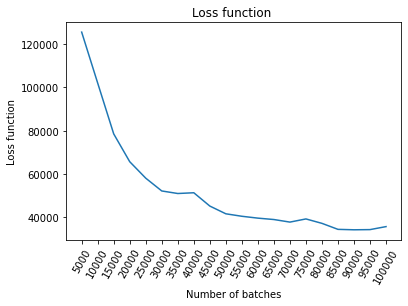

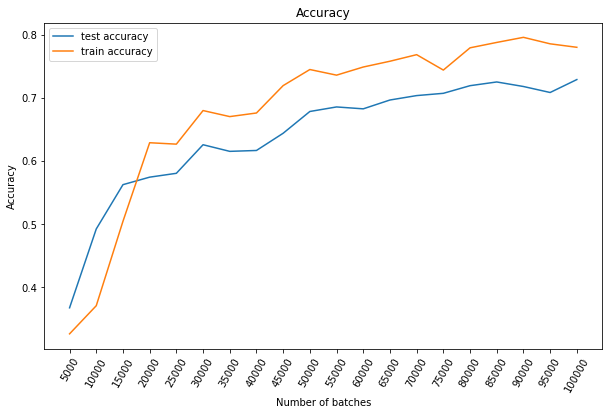

In [12]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255

x_ttest = x_test / 255




class mlp:
    hidden_1_layer = {}
    hidden_2_layer = {}
    output_layer = {}

    def __init__(self, x, layer, y):
        
        
        self.hidden_1_layer['parameter'] = np.random.randn(layer,x) / np.sqrt(num_x)
        self.hidden_1_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.hidden_2_layer['parameter'] = np.random.randn(layer,layer) / np.sqrt(layer)
        self.hidden_2_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.output_layer['parameter'] = np.random.randn(y,layer) / np.sqrt(layer)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(layer)
        
        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        return r
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    
 

    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        Hidden_lay_1 = np.matmul(self.hidden_1_layer['parameter'],x).reshape((self.hid_size,1)) + self.hidden_1_layer['bias']
        Hidden_l1 = np.array(self.sigmoid(Hidden_lay_1)).reshape((self.hid_size,1))
        
        Hidden_lay_2 = np.matmul(self.hidden_2_layer['parameter'],Hidden_l1).reshape((self.hid_size,1)) + self.hidden_2_layer['bias']
        Hidden_l = np.array(self.sigmoid(Hidden_lay_2)).reshape((self.hid_size,1))
        
        out_lay = np.matmul(self.output_layer['parameter'],Hidden_l).reshape((self.output_size,1)) + self.output_layer['bias']
        predict_r = np.squeeze(self.Softmax(out_lay))
        error = self.cross_entropy(predict_r,y)
        values=[Hidden_lay_1,Hidden_l,Hidden_lay_2,Hidden_l,out_lay,predict_r,error]
        keys= ['Hidden_lay_1','Hidden_l1','Hidden_lay_2','Hidden_l','out_lay','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       


        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['Hidden_l'].transpose())
        delta = np.matmul(self.output_layer['parameter'].transpose(),dU)
        db_2 = delta.reshape(self.hid_size,1)*self.derivative_sigmoid(forward_pr['Hidden_lay_2']).reshape(self.hid_size,1)
        dV = np.matmul(db_2.reshape((self.hid_size,1)),forward_pr['Hidden_l'].reshape((1,128)))
        
        
     
        dC1 = np.matmul(db_2,forward_pr['Hidden_l1'].transpose())
        delta = np.matmul(self.hidden_2_layer['parameter'].transpose(),db_2)
        db_1 = delta.reshape(self.hid_size,1)*self.derivative_sigmoid(forward_pr['Hidden_lay_1']).reshape(self.hid_size,1)
        dW = np.matmul(db_1.reshape((self.hid_size,1)),x.reshape((1,784)))
        
        values = [dC,db_2,db_1,dW,dV,dU]
        keys = ['dC','db_2','db_1','dW','dv','du']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):
        # update the hyperparameters
        self.output_layer['parameter'] -= learning_rate*b_result['dC']
        self.output_layer['bias'] -= learning_rate*b_result['du']
        
        self.hidden_2_layer['bias'] -= learning_rate*b_result['db_2']
        self.hidden_2_layer['parameter'] -= learning_rate*b_result['dv']
        
        self.hidden_1_layer['bias'] -= learning_rate*b_result['db_1']
        self.hidden_1_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_iterations = 1000, learning_rate = 0.5):
        # generate a random list of indices for the training set
        rand_indices = np.random.choice(len(X_train), num_iterations, replace=True)
        
        def l_rate(base_rate, ite, num_iterations, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_iterations*5))
            else:
                return base_rate

        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))
            

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X, Y):
        # test the model on the training dataset
        total_correct = 0
        for n in range(len(X)):
            y = Y[n]
            x = X[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy: ',total_correct/len(X))
        return total_correct/np.float(len(X))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 100000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 128

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_iterations=num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test)
accu_train = model.predict(x_ttrain,y_train)

import matplotlib.pyplot as plt
plt.plot(cost_dict.keys(),cost_dict.values())
plt.ylabel('Loss function')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Loss function ')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(tests_dict.keys(),tests_dict.values(),label='test accuracy')
plt.plot(train_dict.keys(),train_dict.values(),label='train accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Number of batches')
plt.xticks(rotation=60)
plt.title('Accuracy')
plt.show()


# MLP with 2 Hidden layers activation function ReLU with 256 units 

In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_trainn, y_trainn), (x_testt, y_testt) = fashion_mnist.load_data()
#mndata = MNIST('./dir_with_mnist_data_files')
#images, labels = mndata.load_training()
#(train_X, train_y), (test_X, test_y) = mnist.load_data()
xx_train = np.asarray(x_trainn).astype(np.float32)
y_train = np.asarray(y_trainn).astype(np.int32)
xx_test = np.asarray(x_testt).astype(np.float32)
y_test = np.asarray(y_testt).astype(np.int32)

x_train=xx_train.reshape(60000,28*28)
x_test=xx_test.reshape(10000,28*28)
######normalization
x_ttrain = x_train / 255

x_ttest = x_test / 255




class mlp:
    hidden_1_layer = {}
    hidden_2_layer = {}
    output_layer = {}

    def __init__(self, x, layer, y):
        
        
        self.hidden_1_layer['parameter'] = np.random.randn(layer,x) / np.sqrt(num_x)
        self.hidden_1_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.hidden_2_layer['parameter'] = np.random.randn(layer,layer) / np.sqrt(layer)
        self.hidden_2_layer['bias'] = np.random.randn(layer,1) / np.sqrt(layer)
        
        self.output_layer['parameter'] = np.random.randn(y,layer) / np.sqrt(layer)
        self.output_layer['bias'] = np.random.randn(y,1) / np.sqrt(layer)
        
        self.input_size = x
        self.hid_size = layer
        self.output_size = y
        
        
    def ReLU(self,Z):
#         Z=np.squeeze(Z)
        r=np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        return r

    def derivative_ReLU(self,Z):
        
        r=np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
        return r
    
    def leaky_ReLU(x):
        data = [max(0.05*value,value) for value in x]
        return np.array(data, dtype=float)


    def derivative_leaky_ReLU(x):
        data = [1 if value>0 else 0.05 for value in x]
        return np.array(data, dtype=float)

    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def derivative_sigmoid(self,Z):
        return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
        
    def tanh(self,Z):
        tanh=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
        dtanh=1-t**2
        return tanh,dtanh

    def Softmax(self,z):
        return 1/sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self,v,y):
        return -np.log(v[y])
    
 

    def forward_propagation(self,x,y):
        # implement the forward computation, calculation of prediction list and error
        Hidden_lay_1 = np.matmul(self.hidden_1_layer['parameter'],x).reshape((self.hid_size,1)) + self.hidden_1_layer['bias']
        Hidden_l1 = np.array(self.ReLU(Hidden_lay_1)).reshape((self.hid_size,1))
        
        Hidden_lay_2 = np.matmul(self.hidden_2_layer['parameter'],Hidden_l1).reshape((self.hid_size,1)) + self.hidden_2_layer['bias']
        Hidden_l = np.array(self.ReLU(Hidden_lay_2)).reshape((self.hid_size,1))
        
        out_lay = np.matmul(self.output_layer['parameter'],Hidden_l).reshape((self.output_size,1)) + self.output_layer['bias']
        predict_r = np.squeeze(self.Softmax(out_lay))
        error = self.cross_entropy(predict_r,y)
        values=[Hidden_lay_1,Hidden_l,Hidden_lay_2,Hidden_l,out_lay,predict_r,error]
        keys= ['Hidden_lay_1','Hidden_l1','Hidden_lay_2','Hidden_l','out_lay','out','error']
        return dict(zip(keys,values))
    

    
    def back_propagation(self,x,y,forward_pr):
       


        E = np.array([0]*self.output_size).reshape((1,self.output_size))
        E[0][y] = 1
        dU = (-(E - forward_pr['out'])).reshape((self.output_size,1))
        dC = np.matmul(dU,forward_pr['Hidden_l'].transpose())
        delta = np.matmul(self.output_layer['parameter'].transpose(),dU)
        db_2 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay_2']).reshape(self.hid_size,1)
        dV = np.matmul(db_2.reshape((self.hid_size,1)),forward_pr['Hidden_l'].reshape((1,256)))
        
        
     
        dC1 = np.matmul(db_2,forward_pr['Hidden_l1'].transpose())
        delta = np.matmul(self.hidden_2_layer['parameter'].transpose(),db_2)
        db_1 = delta.reshape(self.hid_size,1)*self.derivative_ReLU(forward_pr['Hidden_lay_1']).reshape(self.hid_size,1)
        dW = np.matmul(db_1.reshape((self.hid_size,1)),x.reshape((1,784)))
        
        values = [dC,db_2,db_1,dW,dV,dU]
        keys = ['dC','db_2','db_1','dW','dv','du']
        return dict(zip(keys,values))


    def optimizer(self,b_result, learning_rate):
        # update the hyperparameters
        self.output_layer['parameter'] -= learning_rate*b_result['dC']
        self.output_layer['bias'] -= learning_rate*b_result['du']
        
        self.hidden_2_layer['bias'] -= learning_rate*b_result['db_2']
        self.hidden_2_layer['parameter'] -= learning_rate*b_result['dv']
        
        self.hidden_1_layer['bias'] -= learning_rate*b_result['db_1']
        self.hidden_1_layer['parameter'] -= learning_rate*b_result['dW']

    def loss(self,X_train,Y_train):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_train)):
            y = Y_train[n]
            x = X_train[n][:]
            loss += self.forward_propagation(x,y)['error']
        return loss

    def fit(self, X_train, Y_train, num_iterations = 1000, learning_rate = 0.5):
        # generate a random list of indices for the training set
        rand_indices = np.random.choice(len(X_train), num_iterations, replace=True)
        
        def l_rate(base_rate, ite, num_iterations, schedule = False):
        # determine whether to use the learning schedule
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite/num_iterations*5))
            else:
                return base_rate

        t = 1
        loss_dict = {}
        test_dict = {}
        train_dict={}
        for i in rand_indices:
            forward_pr = self.forward_propagation(X_train[i],Y_train[i])
            b_result = self.back_propagation(X_train[i],Y_train[i],forward_pr)
            self.optimizer(b_result,l_rate(learning_rate,i,num_batches,True))
            

            if t % 5000 == 0:
                loss = self.loss(X_train,Y_train)
                test = self.predict(x_test,y_test)
                train = self.predict(X_train,Y_train)
                print('iteration {},'.format(t),'loss = {}, test = {},train={}'.format(loss,test,train))
                loss_dict[str(t)]=loss
                test_dict[str(t)]=test
                train_dict[str(t)]=train

            t += 1

        return loss_dict, test_dict,train_dict

    def predict(self,X_test, Y_test):
        # test the model on the training dataset
        total_correct = 0
        for n in range(len(X_test)):
            y = Y_test[n]
            x = X_test[n][:]
            prediction = np.argmax(self.forward_propagation(x,y)['out'])
            if (prediction == y):
                total_correct += 1
        print('Accuarcy: ',total_correct/len(X_test))
        return total_correct/np.float(len(X_test))
    
    def evaluate_acc(self, X, y):
        return sum(self.predict(X) == y) / len(y)
####################################################################################

# set the number of batches
num_batches = 100000
# set the base learning rate
learning_rate = 0.01
# number of x
num_x = 28*28
# number of y
num_y = 10
# size of layer layer
layer_size = 256

# data fitting, training and accuracy evaluation
model = mlp(num_x,layer_size,num_y)
cost_dict, tests_dict,train_dict = model.fit(x_ttrain,y_train,num_iterations=num_batches,learning_rate=learning_rate)
accu_test = model.predict(x_ttest,y_test)
accu_train = model.predict(x_ttrain,y_train)


C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\2500313506.py:74: RuntimeWarning: overflow encountered in exp
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\2500313506.py:74: RuntimeWarning: invalid value encountered in multiply
  return 1/sum(np.exp(z)) * np.exp(z)
C:\Users\FATEMEH\AppData\Local\Temp\ipykernel_18872\2500313506.py:77: RuntimeWarning: divide by zero encountered in log
  return -np.log(v[y])


Accuarcy:  0.4907
Accuarcy:  0.6288166666666667
iteration 5000, loss = 53454.5333121805, test = 0.4907,train=0.6288166666666667
Accuarcy:  0.6256
Accuarcy:  0.7845
iteration 10000, loss = 37004.881165205814, test = 0.6256,train=0.7845
Accuarcy:  0.5909
Accuarcy:  0.7962333333333333
iteration 15000, loss = 33754.41018902668, test = 0.5909,train=0.7962333333333333
Accuarcy:  0.6078
Accuarcy:  0.798
iteration 20000, loss = 32441.649458986813, test = 0.6078,train=0.798
Accuarcy:  0.6263
Accuarcy:  0.7577
iteration 25000, loss = 35616.496149636456, test = 0.6263,train=0.7577
Accuarcy:  0.6158
Accuarcy:  0.8225666666666667
iteration 30000, loss = 30941.943515366132, test = 0.6158,train=0.8225666666666667
Accuarcy:  0.6335
Accuarcy:  0.8215833333333333
iteration 35000, loss = 28507.05512886485, test = 0.6335,train=0.8215833333333333
Accuarcy:  0.6077
Accuarcy:  0.8102
iteration 40000, loss = 30769.761415842055, test = 0.6077,train=0.8102
Accuarcy:  0.6049
Accuarcy:  0.8186333333333333
iterati